#connect with drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Housing.csv LinearRegression model

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AI holistc a to z (data)/Housing/Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df=df.drop_duplicates()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

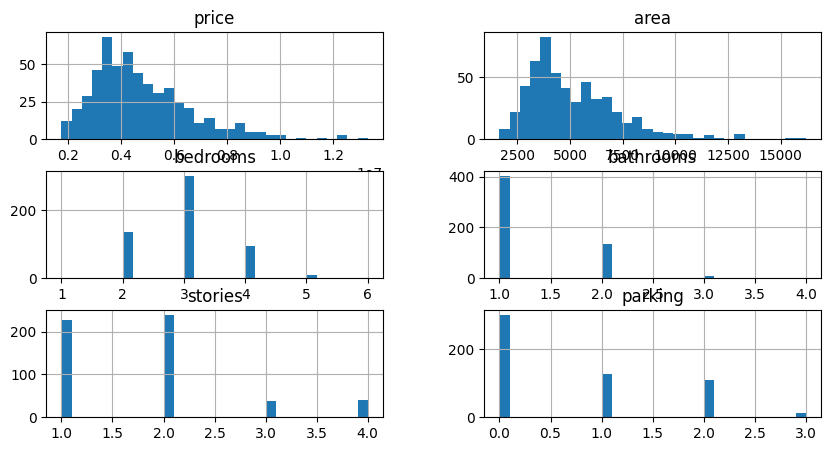

In [ ]:
df.hist(bins=30,figsize=(10,5))

In [ ]:
la_en={}
for column in ['mainroad','guestroom','basement','basement','hotwaterheating','airconditioning','prefarea']:
    la_en[column]=LabelEncoder()
    df[column]=la_en[column].fit_transform(df[column])
df=pd.get_dummies(df,columns=['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [ ]:
x=df.drop('price',axis=1)
y=df['price']

In [ ]:
x_train,x_tets,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
print(len(x_train))
print(len(x_tets))

436
109


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pr=model.predict(x_tets)

In [ ]:
mse=mean_squared_error(y_test,y_pr)
print(mse)

829690385060.8583


In [ ]:
joblib.dump(model,r"Housing.pk1")

['Housing.pk1']

In [ ]:
def pre_hos_price(model,fute):
    input_data=pd.DataFrame([fute],columns=x.columns)
    pred=model.predict(input_data)
    return pred

In [ ]:
user_input={}
for column in x.columns:
    user_input[column]=input(f"enter:{column}")
pred=pre_hos_price(model,user_input)
print('pred:',pred[0])

enter:area1
enter:bedrooms1
enter:bathrooms1
enter:stories1
enter:mainroad1
enter:guestroom1
enter:basement1
enter:hotwaterheating1
enter:airconditioning1
enter:parking1
enter:prefarea1
enter:furnishingstatus_furnished1
enter:furnishingstatus_semi-furnished1
enter:furnishingstatus_unfurnished1
pred: 5202223.275395874


#covid19-radiography-database svm,MultinomialNB,CNN

In [ ]:
!pip install kaggle

# Assuming you have your kaggle.json configured
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d tawsifurrahman/covid19-radiography-database -p /content/covid19-radiography-database

print('Data source import complete.')
print(f"Data saved to: /content/covid19-radiography-database")
import kagglehub
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
# Specify the target directory
target_directory = "/content/covid19-radiography-database"  # Replace with your desired directory

# Remove 'path' argument, letting kagglehub download to default location
tawsifurrahman_covid19_radiography_database_path = kagglehub.dataset_download('tawsifurrahman/covid19-radiography-database')

# Move the downloaded data to the target directory
import shutil
shutil.move(tawsifurrahman_covid19_radiography_database_path, target_directory)

print('Data source import complete.')
print(f"Data saved to: {target_directory}")

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
 98% 765M/778M [00:09<00:00, 161MB/s]
100% 778M/778M [00:09<00:00, 86.3MB/s]
Data source import complete.
Data saved to: /content/covid19-radiography-database


100%|██████████| 778M/778M [00:06<00:00, 118MB/s]

Extracting files...


Data source import complete.
Data saved to: /content/covid19-radiography-database


###import library

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import tensorflow as tf
from google.colab.patches import cv2_imshow

import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

###Data preprocessing



In [ ]:
# label tagging to the images
levels = ['Normal', 'COVID', 'Lung_Opacity', 'Viral Pneumonia']
path = "/content/covid19-radiography-database/5/COVID-19_Radiography_Dataset"

data = []
for level in (levels):
    data_dir = os.path.join(path, level + '/images')
    for file in os.listdir(data_dir):
        data.append(['{}/images/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'result'])

data['path'] = path + '/' + data['image_file']

data.head(-1)

,image_file,result,path
0,Normal/images/Normal-7702.png,Normal,/content/covid19-radiography-database/5/COVID-...
1,Normal/images/Normal-6127.png,Normal,/content/covid19-radiography-database/5/COVID-...
2,Normal/images/Normal-1160.png,Normal,/content/covid19-radiography-database/5/COVID-...
3,Normal/images/Normal-3941.png,Normal,/content/covid19-radiography-database/5/COVID-...
4,Normal/images/Normal-2254.png,Normal,/content/covid19-radiography-database/5/COVID-...
...,...,...,...
21159,Viral Pneumonia/images/Viral Pneumonia-50.png,Viral Pneumonia,/content/covid19-radiography-database/5/COVID-...
21160,Viral Pneumonia/images/Viral Pneumonia-966.png,Viral Pneumonia,/content/covid19-radiography-database/5/COVID-...
21161,Viral Pneumonia/images/Viral Pneumonia-1177.png,Viral Pneumonia,/content/covid19-radiography-database/5/COVID-...
21162,Viral Pneumonia/images/Viral Pneumonia-1065.png,Viral Pneumonia,/content/covid19-radiography-database/5/COVID-...


In [ ]:
print("Numbers of X-ray images: {}".format(data.shape[0]))

Numbers of X-ray images: 21165


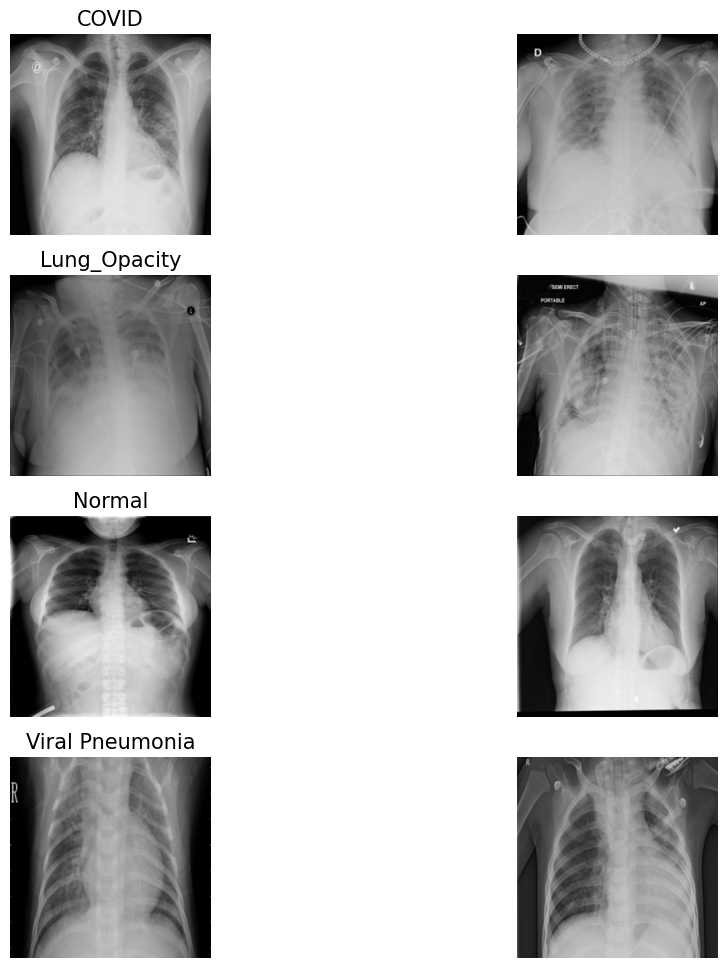

In [ ]:
#visualisation

n_samples = 2

fig, m_axs = plt.subplots(4, n_samples, figsize = (12, 12))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['result']).groupby('result')):
    n_axs[0].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.iterrows()):
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

<ipython-input-29-6e24529e5eb0>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sx.set_xticklabels(labels=sx.get_xticklabels(), rotation=90)


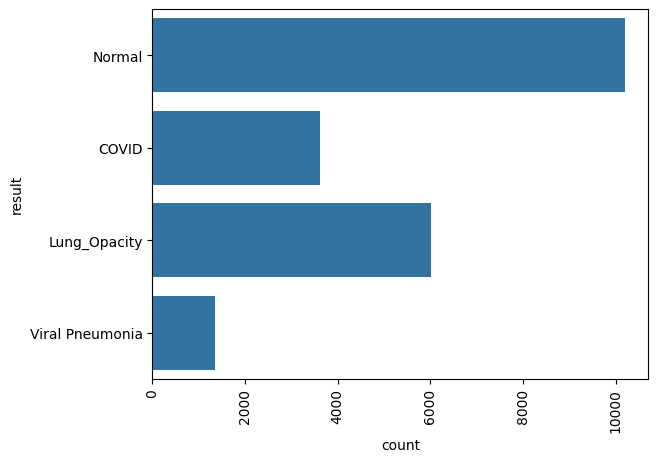

In [ ]:
sx = sns.countplot(data['result'])
sx.set_xticklabels(labels=sx.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
for level in levels:
  print(f'{level}: {list(data["result"]).count(level)}')

Normal: 10192
COVID: 3616
Lung_Opacity: 6012
Viral Pneumonia: 1345


In [ ]:
round(data['result'].value_counts() / data.shape[0] * 100,2)

,count
result,
Normal,48.15
Lung_Opacity,28.41
COVID,17.08
Viral Pneumonia,6.35


In [ ]:
#resize image to 64*64 and (1) is grayscal
pixel_img = []

for image in tqdm(data['path']):
    img=Image.open(image)
    img=ImageOps.grayscale(img)
    img=img.resize((64,64))
    img=np.asarray(img)
    img=img.reshape((64,64,1))
    pixel_img.append(img)

100%|██████████| 21165/21165 [01:02<00:00, 336.38it/s]


In [ ]:
pixel_img = np.array(pixel_img)
label_img = data['result'].map({'Normal': 0, 'COVID': 1, 'Lung_Opacity' : 2,
                               'Viral Pneumonia' : 3})

print(pixel_img.shape, label_img.shape)

(21165, 64, 64, 1) (21165,)


####train_test_split

In [ ]:
#20% will be used for test
X_train, X_test, y_train, y_test = train_test_split(pixel_img, label_img,
                                                    test_size=0.2, stratify=label_img)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#16932 images for train et 4233 for test

(16932, 64, 64, 1)
(4233, 64, 64, 1)
(16932,)
(4233,)


In [ ]:
round(y_train.value_counts() / y_train.shape[0] * 100,2)

,count
result,
0,48.16
2,28.40
1,17.09
3,6.35


In [ ]:
input_size = X_train.shape[1] * X_train.shape[2]
print(input_size)

num_classes = len(np.unique(y_train))
print(num_classes)

4096
4


In [ ]:
# flatten the image
X_train = np.reshape(X_train, [X_train.shape[0], input_size])
X_train = X_train.astype('float32') / 255

X_test = np.reshape(X_test, [X_test.shape[0], input_size])
X_test = X_test.astype('float32') / 255

###SVM model ML

In [ ]:
from sklearn import svm

# Train the SVM
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8228206945428774

###MultinomialNB model Ml

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test)

###ConvNet CNN model DL

####train_test_split for CNN

In [ ]:
# Reconstruct 2D matrix 64x64
# 20% for test

X_train, X_test, y_train, y_test = train_test_split(pixel_img, label_img,
                                                    test_size=0.2, stratify=label_img)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

input_shape = (X_train.shape[1],X_train.shape[2],1)

(16932, 64, 64, 1)
(4233, 64, 64, 1)
(16932, 4)
(4233, 4)


####train model CNN

In [ ]:
cnn_model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"),
        layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Flatten(),
        layers.Dropout(0.5, seed=235),
        layers.Dense(512, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
cnn_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 638,948 (2.44 MB)

 Trainable params: 638,948 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

start_time = time.time()
history = cnn_model1.fit(X_train, y_train, epochs=50, batch_size=128)
print("Temps de calcul :", time.time() - start_time)

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.5259 - loss: 1.0909
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6929 - loss: 0.7458
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7471 - loss: 0.6373
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.7778 - loss: 0.5656
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8116 - loss: 0.4900
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8257 - loss: 0.4537
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8483 - loss: 0.3993
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8580 - loss: 0.3768
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8629 - loss: 0.3721
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8618 - loss: 0.3685
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8765 - loss: 0.3326
Epoch 12/50
133/133 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
loss, acc = cnn_model1.evaluate(X_test, y_test, verbose=0)

print("Accuracy model8 adam: %.2f%%" % (100.0 * acc))

predictions = cnn_model1.predict(X_test)
pd.crosstab(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

Accuracy model8 adam: 90.53%
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


col_0,0,1,2,3
row_0,,,,
0,1968,28,36,6
1,38,676,8,1
2,223,45,935,0
3,9,7,0,253


###classification_report matrix and accuracy

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {svm_model}:\n" #svm_model or nb_model
      f"{metrics.classification_report(y_test, y_pred)}\n")
#used After SVM and MultinomialNB model must

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2038
           1       0.82      0.62      0.71       723
           2       0.80      0.76      0.78      1203
           3       0.96      0.91      0.93       269

    accuracy                           0.82      4233
   macro avg       0.85      0.80      0.82      4233
weighted avg       0.82      0.82      0.82      4233




In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

print("Classification report for classifier :\n"
      f"{metrics.classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))}\n")
#used After CNN model must

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2038
           1       0.89      0.93      0.91       723
           2       0.96      0.78      0.86      1203
           3       0.97      0.94      0.96       269

    accuracy                           0.91      4233
   macro avg       0.93      0.90      0.91      4233
weighted avg       0.91      0.91      0.90      4233




#Churn

###load data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI holistc a to z (data)/Churn/Churn.csv")

###Data preprocessing

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
# Get the list of column names
df_columns = df.columns.tolist()

# Loop through each column and print the column name with its unique values
for column in df_columns:
    print(f"\nColumn: {column}")
    print(f"Unique Values: {df[column].unique()}")
    print("-" * 40)  # Separator for better readability


Column: customerID
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------

Column: gender
Unique Values: ['Female' 'Male']
----------------------------------------

Column: SeniorCitizen
Unique Values: [0 1]
----------------------------------------

Column: Partner
Unique Values: ['Yes' 'No']
----------------------------------------

Column: Dependents
Unique Values: ['No' 'Yes']
----------------------------------------

Column: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------

Column: PhoneService
Unique Values: ['No' 'Yes']
----------------------------------------

Column: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']
--------------------------------

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check unique values in PaymentMethod
print(df['PaymentMethod'].unique())
# Remove "automatic" from PaymentMethod labels
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']


In [ ]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

# Loop through each feature with missing values and print the feature name and the percentage of missing values
for feature in features_na:
    print(f"{feature}: {round(df[feature].isnull().mean() * 100, 4)}% missing values")

TotalCharges: 0.1562% missing values


In [ ]:
df[df[features_na[0]].isnull()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


####target variable

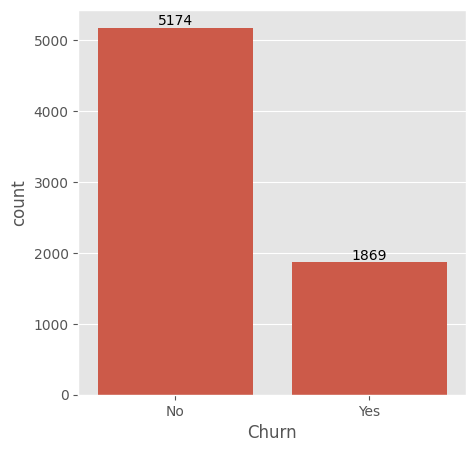

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply ggplot style
plt.style.use('ggplot')

# Create a count plot for the target variable 'Churn'
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.show()
# There is in this data over sampling in target(churn)

####show features for colums

In [ ]:
# Define a function to plot categorical features against the target
import math
def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / 2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.countplot(x=column, data=df, hue=target, palette="Blues")
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

In [ ]:
# Define a function to plot numerical features against the target
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values) / 2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))

    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.kdeplot(df[df[target] == "Yes"][column], fill=True, label="Churn", ax=ax)
        sns.kdeplot(df[df[target] == "No"][column], fill=True, label="No Churn", ax=ax)
        ax.set_title(column)
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


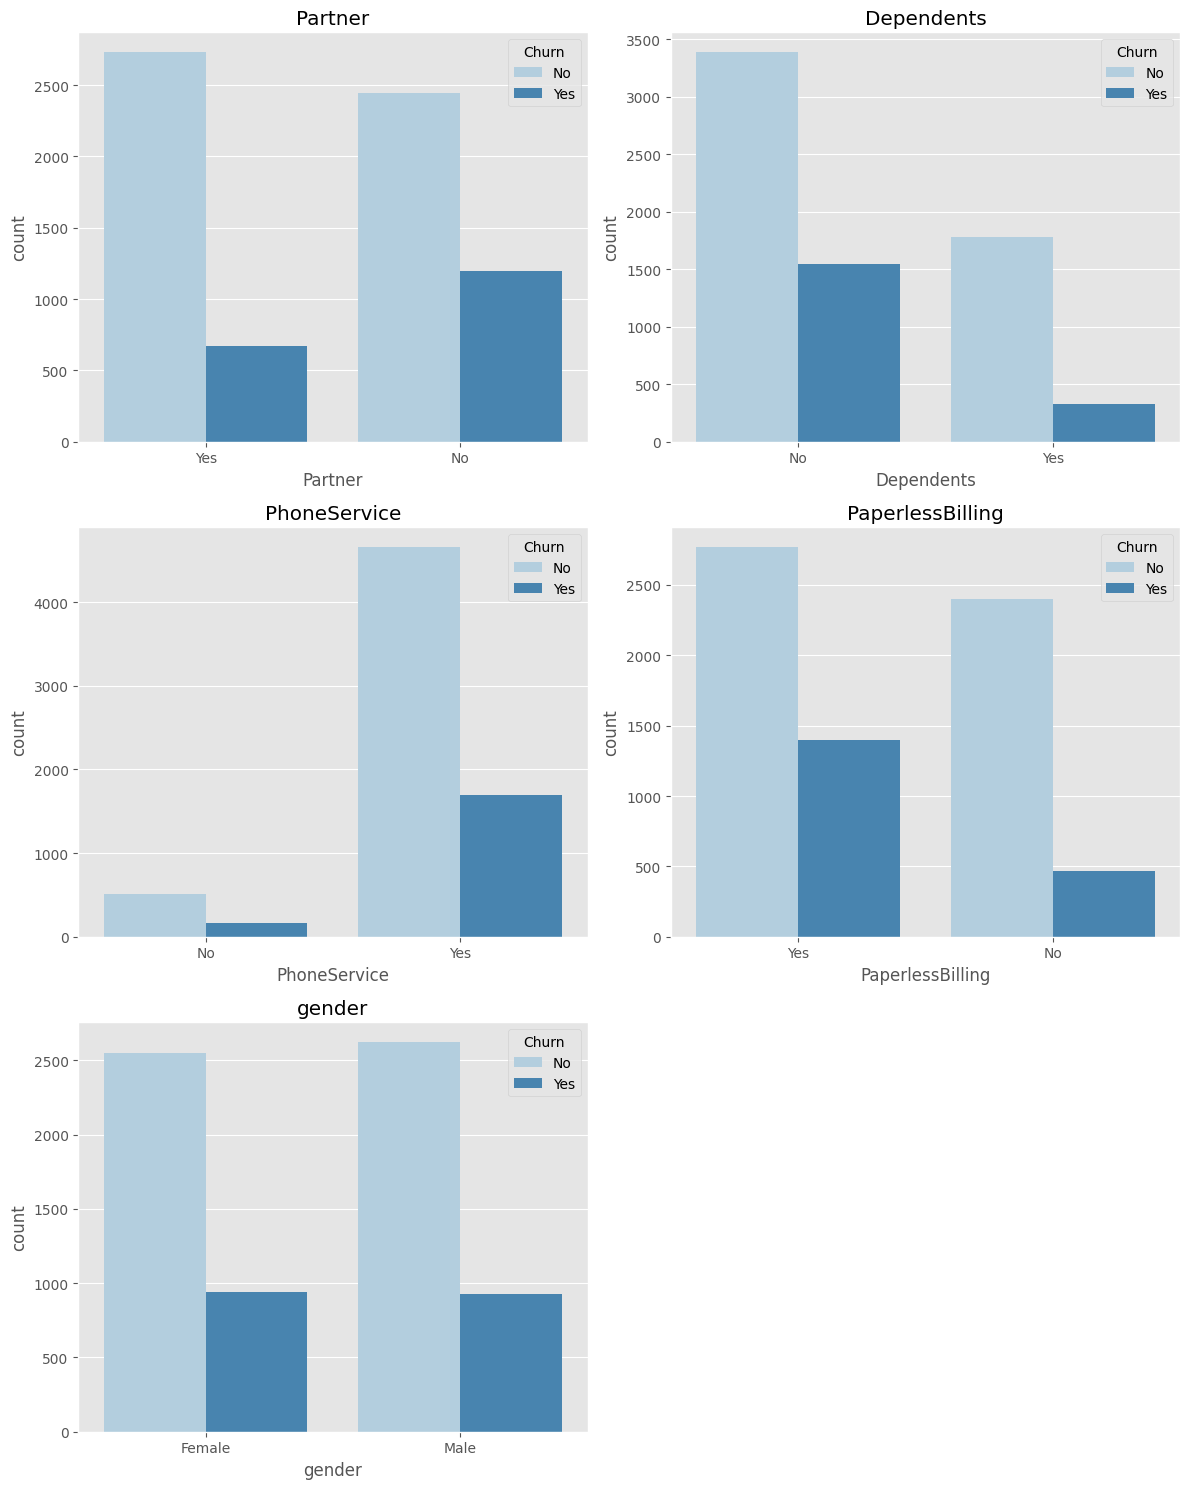

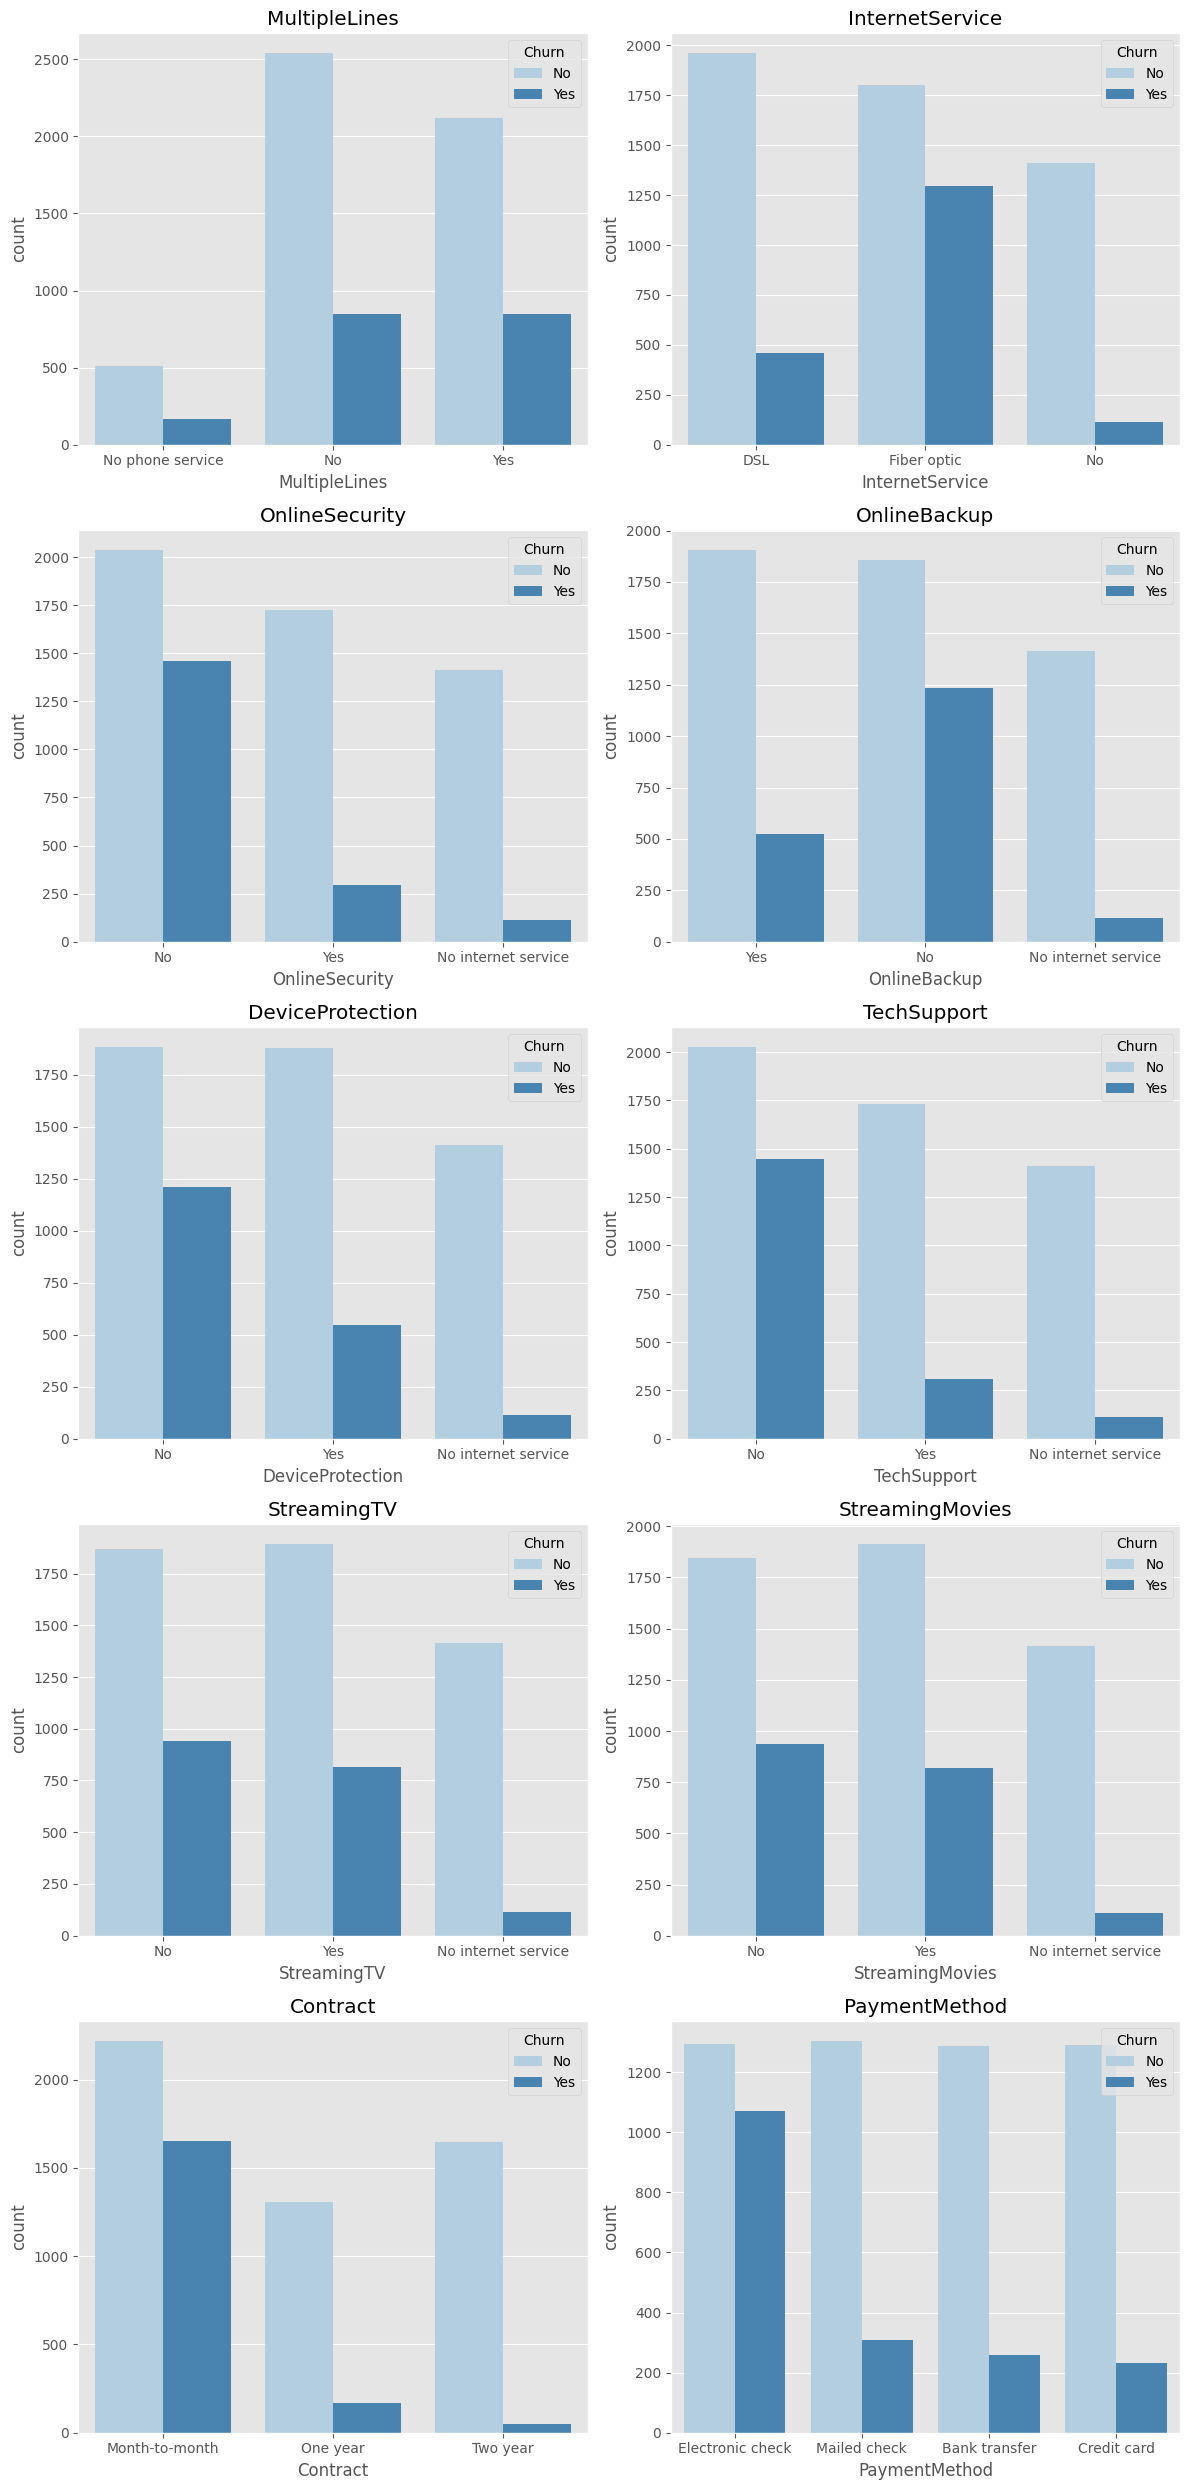

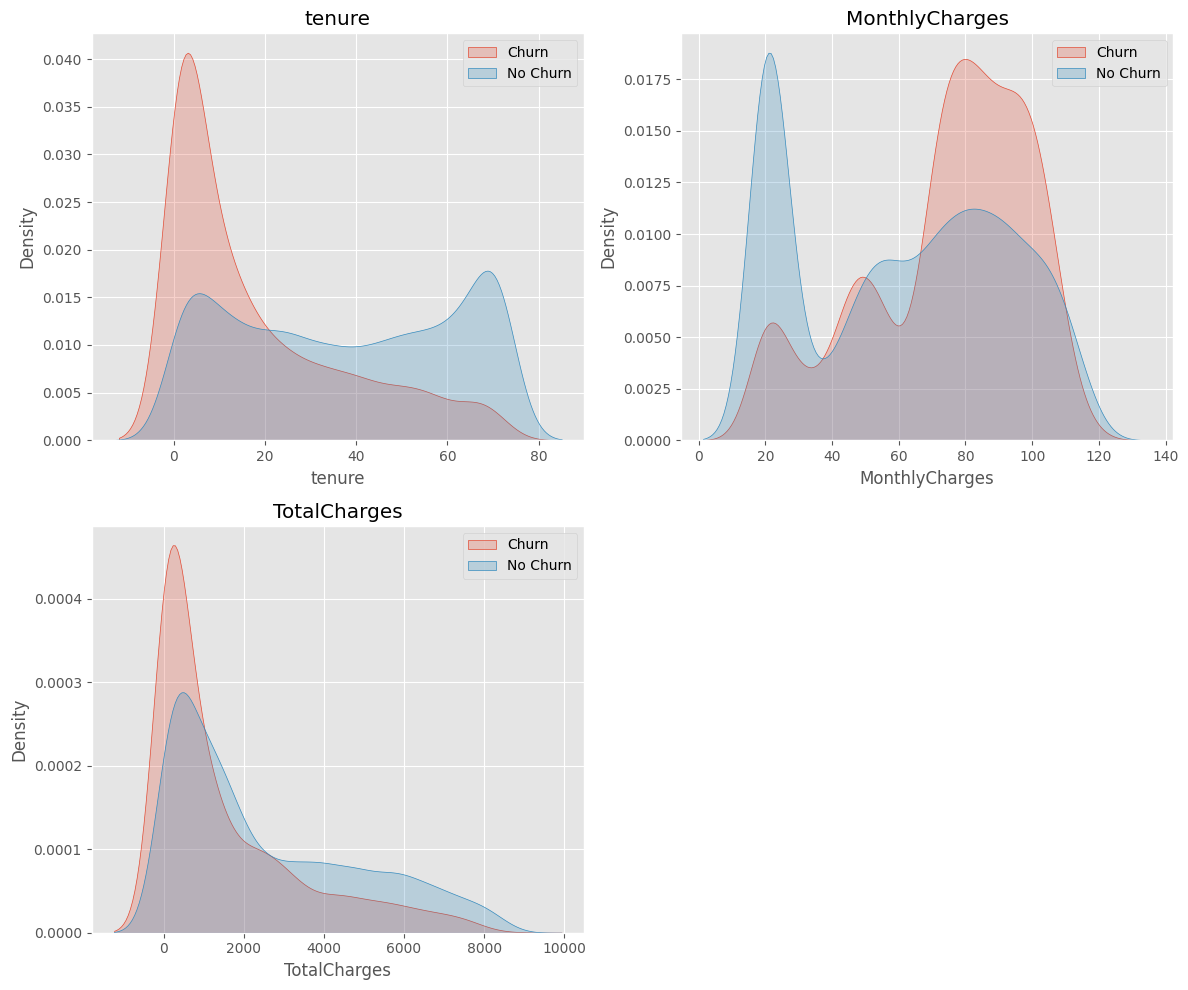

In [ ]:
# List of service-related categorical features
label_encode_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling","gender"]

one_hot_encode_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                       "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                       "Contract", "PaymentMethod"]
min_max_scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]


# Plot these features
plot_categorical_to_target(df, label_encode_cols, "Churn")
plot_categorical_to_target(df, one_hot_encode_cols, "Churn")
histogram_plots(df, min_max_scale_cols, "Churn")



In [ ]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

####modeling

#####encoding

In [ ]:
#target Encodeing
from sklearn.preprocessing import LabelEncoder
import joblib
le_target = LabelEncoder()
y = le_target.fit_transform(y)
joblib.dump(le_target, 'label_encoder_target.pkl')

['label_encoder_target.pkl']

In [ ]:
#number fute Scaleing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X[min_max_scale_cols] = X[min_max_scale_cols].replace(' ', np.nan).astype(float)
X[min_max_scale_cols] = X[min_max_scale_cols].fillna(X[min_max_scale_cols].mean())
min_max_scaler = MinMaxScaler()
scaled_numerical = min_max_scaler.fit_transform(X[min_max_scale_cols])
joblib.dump(min_max_scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [ ]:
#same fute Encodeing
label_encoders = {}
for col in label_encode_cols :
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
#One-Hot Encode for fute unnum
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(X[one_hot_encode_cols])
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')


['one_hot_encoder.pkl']

#####Combine Processed and train_test_split

In [ ]:
import numpy as np
X_processed = np.hstack((X[label_encode_cols ].values, scaled_numerical, one_hot_encoded))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

#####select model and train

In [ ]:
#select LogisticRegression for train
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
model_file = 'logistic_regression_model.pkl'
joblib.dump(model, model_file)

['logistic_regression_model.pkl']

#####app

In [ ]:
import gradio as gr

label_encoders = joblib.load('label_encoders.pkl')
one_hot_encoder = joblib.load('one_hot_encoder.pkl')
min_max_scaler = joblib.load('min_max_scaler.pkl')
model = joblib.load('logistic_regression_model.pkl')
le_target = joblib.load('label_encoder_target.pkl')

def preprocess_data(data):
    df = pd.DataFrame([data])

    label_encode_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "gender"]
    one_hot_encode_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                           "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                           "Contract", "PaymentMethod"]
    min_max_scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

    for col in label_encode_cols + one_hot_encode_cols:
        df[col] = df[col].str.strip()

    df[min_max_scale_cols] = df[min_max_scale_cols].replace(' ', np.nan).astype(float)
    df[min_max_scale_cols] = df[min_max_scale_cols].fillna(df[min_max_scale_cols].mean())

    for col in label_encode_cols:
        le = label_encoders[col]
        df[col] = le.transform(df[col])

    one_hot_encoded = one_hot_encoder.transform(df[one_hot_encode_cols])

    scaled_numerical = min_max_scaler.transform(df[min_max_scale_cols])

    X_processed = np.hstack((df[label_encode_cols].values, scaled_numerical, one_hot_encoded))

    return X_processed

def predict(gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service,
            online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies,
            contract, paperless_billing, payment_method, monthly_charges, total_charges):
    data = {
        "gender": gender,
        "SeniorCitizen": senior_citizen,
        "Partner": partner,
        "Dependents": dependents,
        "tenure": tenure,
        "PhoneService": phone_service,
        "MultipleLines": multiple_lines,
        "InternetService": internet_service,
        "OnlineSecurity": online_security,
        "OnlineBackup": online_backup,
        "DeviceProtection": device_protection,
        "TechSupport": tech_support,
        "StreamingTV": streaming_tv,
        "StreamingMovies": streaming_movies,
        "Contract": contract,
        "PaperlessBilling": paperless_billing,
        "PaymentMethod": payment_method,
        "MonthlyCharges": monthly_charges,
        "TotalCharges": total_charges
    }

    try:
        X_new = preprocess_data(data)
        prediction = model.predict(X_new)
        prediction = le_target.inverse_transform(prediction)
        return "Churn" if prediction[0] == 'Yes' else "No Churn"
    except Exception as e:
        print("Error during prediction:", e)
        return str(e)

inputs = [
    gr.Radio(label="Gender", choices=["Female", "Male"]),
    gr.Number(label="Senior Citizen (0 or 1)"),
    gr.Radio(label="Partner", choices=["Yes", "No"]),
    gr.Radio(label="Dependents", choices=["Yes", "No"]),
    gr.Number(label="Tenure (integer)"),
    gr.Radio(label="Phone Service", choices=["Yes", "No"]),
    gr.Radio(label="Multiple Lines", choices=["Yes", "No", "No phone service"]),
    gr.Radio(label="Internet Service", choices=["DSL", "Fiber optic", "No"]),
    gr.Radio(label="Online Security", choices=["Yes", "No", "No internet service"]),
    gr.Radio(label="Online Backup", choices=["Yes", "No", "No internet service"]),
    gr.Radio(label="Device Protection", choices=["Yes", "No", "No internet service"]),
    gr.Radio(label="Tech Support", choices=["Yes", "No", "No internet service"]),
    gr.Radio(label="Streaming TV", choices=["Yes", "No", "No internet service"]),
    gr.Radio(label="Streaming Movies", choices=["Yes", "No", "No internet service"]),
    gr.Radio(label="Contract", choices=["Month-to-month", "One year", "Two year"]),
    gr.Radio(label="Paperless Billing", choices=["Yes", "No"]),
    gr.Radio(label="Payment Method", choices=["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]),
    gr.Number(label="Monthly Charges (float)"),
    gr.Number(label="Total Charges (float)")
]

outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict, inputs=inputs, outputs=outputs, title="Churn Prediction Model").launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://740d95f522fa71e8e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Ultralytics create and run model

##install Ultralytics

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 28.9 MB/s eta 0:00:00


##create model

###Library

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 204MB/s]


###API for data or dirction

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IHZ6TVDz3MTd1tmO9V4l")
project = rf.workspace("roboflow-100").project("solar-panels-taxvb")
version = project.version(2)
dataset = version.download("yolov8n")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...


RuntimeError: {'error': 'yolov8n is an invalid format for project type object-detection. Please use one of: clip, coco, coco-mmdetection, createml, darknet, multiclass, tensorflow, tfrecord, voc, yolokeras, yolov4pytorch, yolov4scaled, yolov5-obb, yolov5pytorch, yolov7pytorch, yolov8, yolov8-obb, yolov9, yolov11, yolov12, mt-yolov6, retinanet, benchmarker, paligemma, paligemma-txt, florence2-od, openai.'}

###train

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/solar-panels-2/data.yaml epochs=3 imgsz=640 patience=25

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/solar-panels-2/data.yaml, epochs=3, time=None, patience=25, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

model = YOLO("/content/runs/detect/train/weights/best.pt")
cap = cv2.VideoCapture("vid.mp4")

while True:
    ret,frame=cap.read()
    frame2=cv2.resize(frame,(640,640))
    res=model(frame2,stream=True)
    for info in res:
        boxes=info.boxes
        for box in boxes:
            con=box.conf[0]
            con=math.ceil(con*100)
            cla = int(box.cls[0])
            if con >50:
                x1,y1,x2,y2=box.xyxy[0]
                x1,y1,x2,y2=int(x1),int(y1),int(x2),int(y2)
                cv2.rectangle(frame,(x1,y1),(x2,y2),(255,0,0),5)
    cv2_imshow(frame2)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#1